Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

## Time Series Components

time series can be broken down into:
- Systematic : Components of the time series that have consistency or recurrence and can be described and modeled.
- Non-Systematic: Components of the time series that cannot be directly modeled.

Systematic Components can be further broken down into:

- Level : The avg value in the series
- Trend : the increasing or decreasing value in the series
- Seasonality : the repeating short-term cycle in the series
- Noise : the random varation in the serires

### Additive model

$$ y(t) = Level + Trend + Seasonality + Noise $$

An additive model is __linear__ where changes over time are consistently made by the same amount. A linear trend is a straight line. A linear seasonality has the __same frequency__ (width of cycles) and __amplitude__ (height of cycles).

### Multiplicative Model

$$ y(t) = Level x Trend x Seasonality x Noise $$

A multiplicative model is __nonlinear__, such as quadratic or exponential. Changes increase or decrease over time. A nonlinear trend is a curved line. A nonlinear __seasonality__ has an increasing or decreasing __frequency and/or amplitude over time__.

In [1]:
# airline passengers dataset
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
airline = pd.read_csv(r"./Datasets/airline-passengers.csv",
                      index_col=0,parse_dates=True)

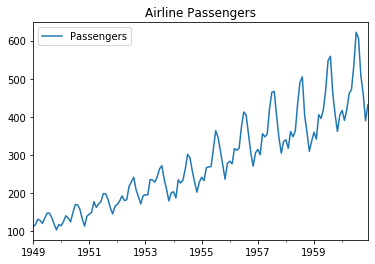

In [3]:
_ = airline.plot().set(title="Airline Passengers",xlabel='')

In [4]:
decomposed = seasonal_decompose(airline,model='multiplicative')

In [5]:
import matplotlib.pyplot as plt
def plot_decomposed(decomposed):
    f , ax = plt.subplots(2,2,figsize=(8,6))
    ax = ax.flatten()
    for ind,attr in enumerate(['observed','trend','seasonal','resid']):
        ax[ind].plot(getattr(decomposed,attr))
        ax[ind].set_title(attr)
    plt.tight_layout(True)

Text(0.5, 1.05, 'Multiplicative Model')

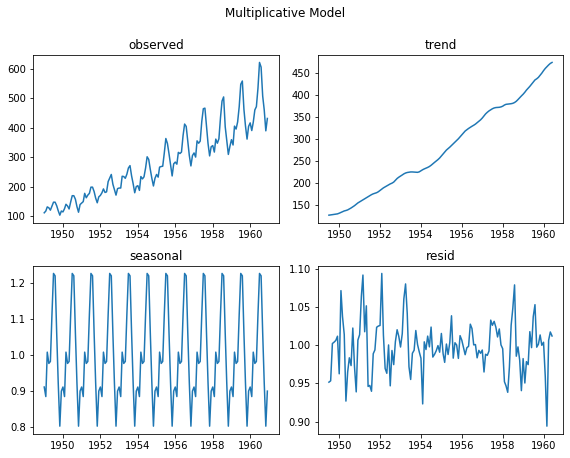

In [6]:
plot_decomposed(decomposed)
plt.suptitle("Multiplicative Model",y=1.05)
# here the scale of seasonal and resid is in "Ratios" 

In [7]:
# Additive decomposition
decomposed_additive = seasonal_decompose(airline,model='additive')

Text(0.5, 1.05, 'Additive Model')

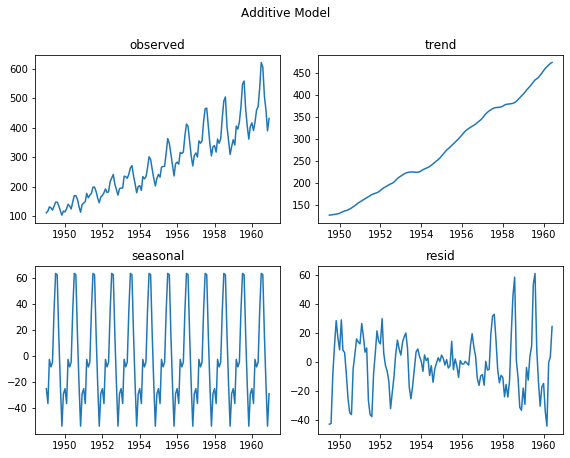

In [8]:
plot_decomposed(decomposed_additive)
plt.suptitle("Additive Model",y=1.05)
# What happens to the resid?
# here the scale of seasonal and resid is in whole numbers

## Summary
- The structure of decomposing time series into level, trend, seasonality, and noise.
- How to automatically decompose a time series dataset with Python.
- How to decompose an additive or multiplicative model and plot the results.